In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lars
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [2]:
automobile = pd.read_csv('datasets/auto-mpg_processed.csv')
automobile.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,age
0,20.5,6,200.0,95,3155,18.2,42
1,23.0,8,350.0,125,3900,17.4,41
2,23.0,4,122.0,86,2220,14.0,49
3,30.0,4,111.0,80,2155,14.8,43
4,12.0,8,350.0,180,4499,12.5,47


In [3]:
result_dict = {}

In [4]:
def build_model(regression_fn,
                y_col,
                x_cols,
                dataset,
                test_frac= 0.2,
                preprocess_fn= None,
                show_plot_Y= False,
                show_plot_scatter= False):
    
    X = dataset[x_cols]
    Y = dataset[y_col]
    
    if preprocess_fn is not None:
        X = preprocess_fn(X)
        
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= test_frac)
    model = regression_fn(x_train, y_train)
    y_pred = model.predict(x_test)
    
    print("training score: ", model.score(x_train, y_train))
    print("test score: ", r2_score(y_test, y_pred))
    
    if show_plot_Y == True:
        fig, ax = plt.subplots(figsize= (12,8))
        
        plt.plot(y_pred, label= 'predicted')
        plt.plot(y_test.values, label= 'actual')
        
        plt.ylabel(y_col)
        plt.legend()
        plt.show()
        
    if show_plot_scatter == True:
        fig, ax = plt.subplots(figsize= (12,9))
        
        plt.scatter(x_test, y_test)
        plt.plot(x_test, y_pred, 'r')
        
        plt.legend(['predicted line', 'observed data'])
        plt.show()
        
    return{
        'training_score': model.score(x_train, y_train),
        'test_score': r2_score(y_test, y_pred)
    }

In [5]:
def compare_results():
    
    for key in result_dict:
        print("regression: ", key)
        print("training score: ", result_dict[key]['training_score'])
        print("test score : ", result_dict[key]['test_score'])
        print()

In [6]:
def linear_reg(x_train, y_train):
    
    model = LinearRegression(normalize= True)
    model.fit(x_train, y_train)
    
    return model

training score:  0.6992184754601044
test score:  0.6471838899960372


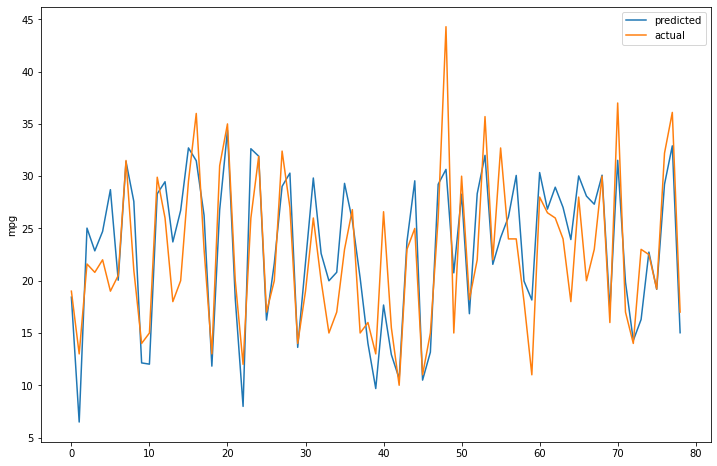

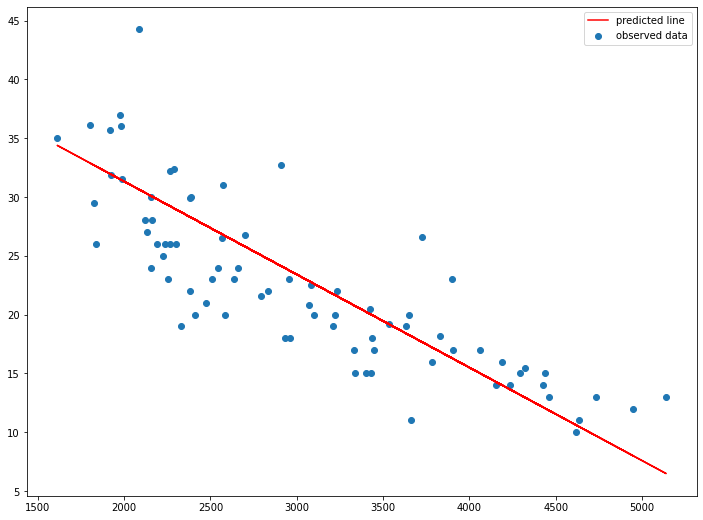

In [7]:
result_dict['single_linear']= build_model(linear_reg,
                                          'mpg',
                                          ['weight'],
                                          automobile,
                                          show_plot_Y= True,
                                          show_plot_scatter= True)

training score:  0.7348306292923018
test score:  0.5609075749187775


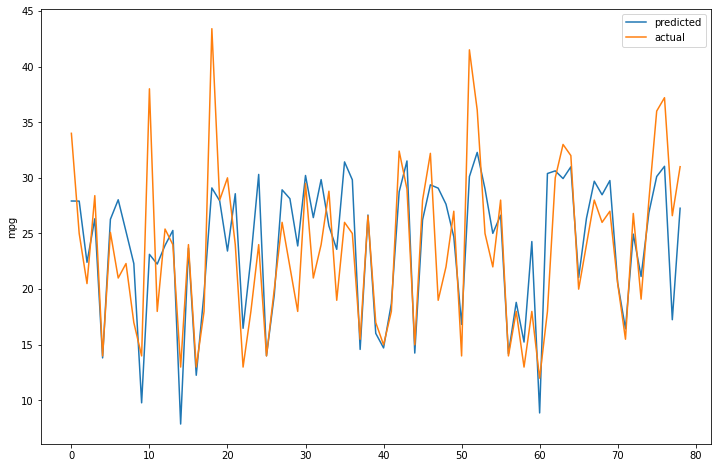

In [8]:
result_dict['kitchen_sink_linear']= build_model(linear_reg,
                                          'mpg',
                                          ['weight',
                                           'cylinders',
                                           'displacement',
                                           'horsepower',
                                           'acceleration'],
                                          automobile,
                                          show_plot_Y= True)

training score:  0.6985998049870783
test score:  0.7297921749257675


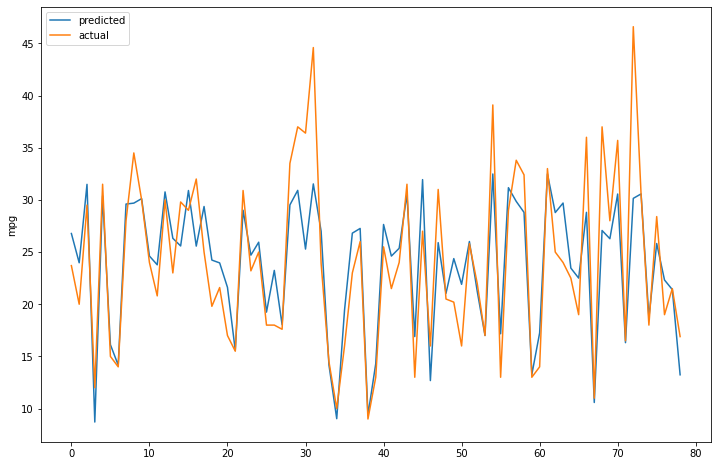

In [9]:
result_dict['parsimonius_linear']= build_model(linear_reg,
                                          'mpg',
                                          ['weight', 'horsepower'],
                                          automobile,
                                          show_plot_Y= True)

In [10]:
compare_results()

regression:  single_linear
training score:  0.6992184754601044
test score :  0.6471838899960372

regression:  kitchen_sink_linear
training score:  0.7348306292923018
test score :  0.5609075749187775

regression:  parsimonius_linear
training score:  0.6985998049870783
test score :  0.7297921749257675



In [11]:
def lasso_reg(x_train, y_train, alpha= 0.5):
    
    model = Lasso(alpha = alpha)
    model.fit(x_train, y_train)
    
    return model

training score:  0.6971053219275963
test score:  0.7437641165634827


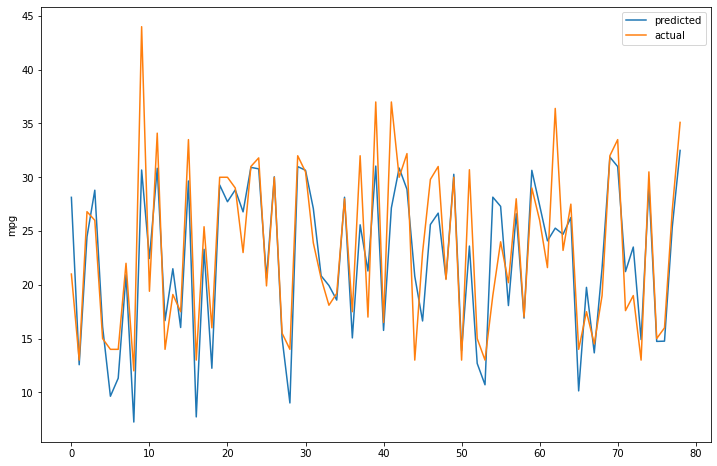

In [12]:
result_dict['kitchen_sink_lasso']= build_model(lasso_reg,
                                              'mpg',
                                              ['weight',
                                              'cylinders',
                                              'displacement',
                                              'horsepower',
                                              'acceleration'],
                                              automobile,
                                              show_plot_Y= True)

In [13]:
compare_results()

regression:  single_linear
training score:  0.6992184754601044
test score :  0.6471838899960372

regression:  kitchen_sink_linear
training score:  0.7348306292923018
test score :  0.5609075749187775

regression:  parsimonius_linear
training score:  0.6985998049870783
test score :  0.7297921749257675

regression:  kitchen_sink_lasso
training score:  0.6971053219275963
test score :  0.7437641165634827



In [14]:
def ridge_reg(x_train, y_train, alpha= 0.5, normalize= True):
    
    model = Ridge(alpha = alpha, normalize= normalize)
    model.fit(x_train, y_train)
    
    return model

training score:  0.7149703212436793
test score:  0.6494776424511215


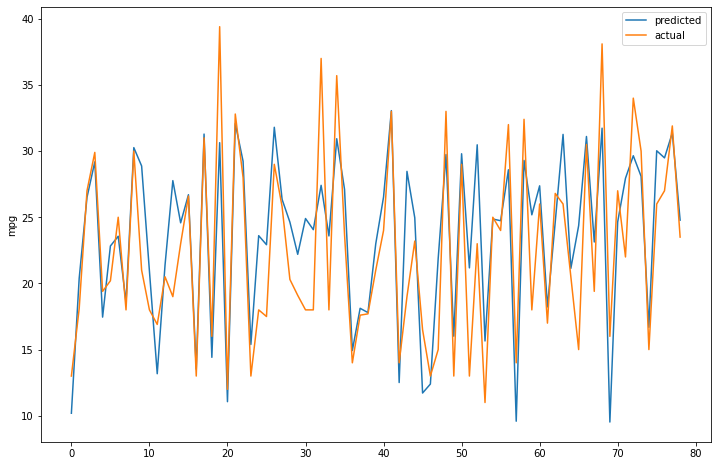

In [15]:
result_dict['kitchen_sink_ridge']= build_model(lasso_reg,
                                              'mpg',
                                              ['weight',
                                              'cylinders',
                                              'displacement',
                                              'horsepower',
                                              'acceleration'],
                                              automobile,
                                              show_plot_Y= True)

In [16]:
compare_results()

regression:  single_linear
training score:  0.6992184754601044
test score :  0.6471838899960372

regression:  kitchen_sink_linear
training score:  0.7348306292923018
test score :  0.5609075749187775

regression:  parsimonius_linear
training score:  0.6985998049870783
test score :  0.7297921749257675

regression:  kitchen_sink_lasso
training score:  0.6971053219275963
test score :  0.7437641165634827

regression:  kitchen_sink_ridge
training score:  0.7149703212436793
test score :  0.6494776424511215



In [17]:
def elastic_net_reg(x_train, y_train,
                    alpha= 1, l1_ratio= 0.5,
                    normalize= False, max_iter= 100000,
                    warm_start= True, equivalent_to= 'Elastic Net'):
    
    print("equivalent to: ", equivalent_to)
    model = ElasticNet(alpha= alpha, l1_ratio= l1_ratio,
                       normalize= normalize, max_iter= max_iter,
                       warm_start= warm_start)
    model.fit(x_train, y_train)
    
    return model

equivalent to:  OLS
training score:  0.7304549388529216
test score:  0.5942547684274024


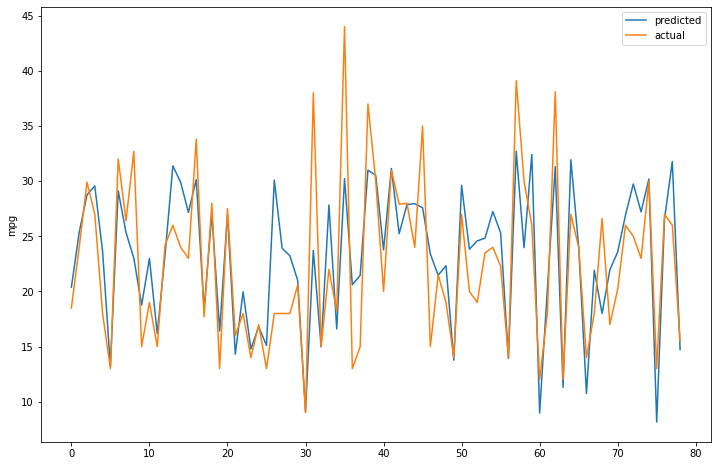

'triggers a convergence warning when implementing\nOLS using the ElasticNet estimator'

In [18]:
from functools import partial

result_dict['kitchen_sink_elastic_net_ols']= build_model(partial(elastic_net_reg,
                                                                 alpha= 0,
                                                                 equivalent_to= 'OLS'),
                                                        'mpg',
                                                        ['weight',
                                                        'cylinders',
                                                        'displacement',
                                                        'horsepower',
                                                        'acceleration'],
                                                        automobile,
                                                        show_plot_Y= True)

'''triggers a convergence warning when implementing
OLS using the ElasticNet estimator'''


equivalent to:  lasso
training score:  0.7025266928434165
test score:  0.7255099935688594


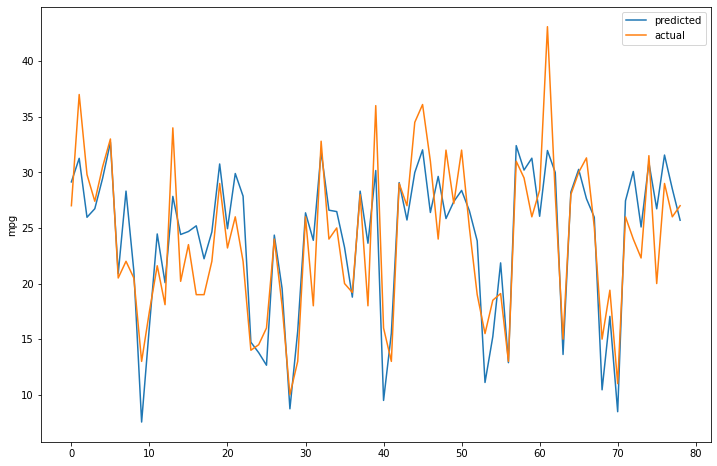

In [19]:
result_dict['kitchen_sink_elastic_net_lasso']= build_model(partial(elastic_net_reg,
                                                                 alpha= 1,
                                                                 l1_ratio= 1,
                                                                 equivalent_to= 'lasso'),
                                                          'mpg',
                                                          ['weight',
                                                          'cylinders',
                                                          'displacement',
                                                          'horsepower',
                                                          'acceleration'],
                                                          automobile,
                                                          show_plot_Y= True)


equivalent to:  ridge
training score:  0.7043677581995811
test score:  0.7135875942540302


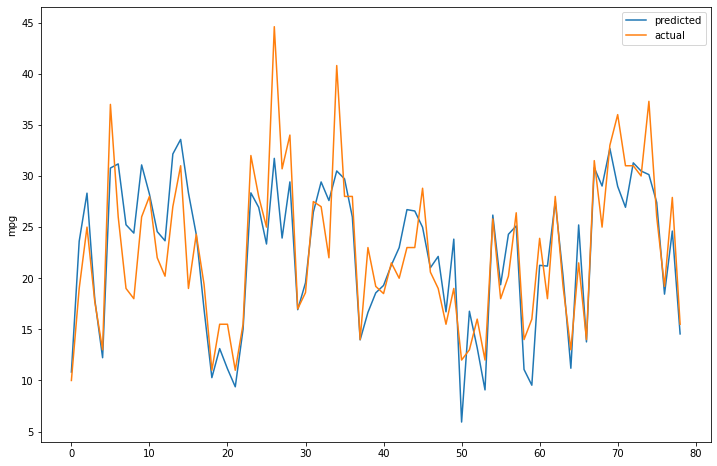

In [20]:
result_dict['kitchen_sink_elastic_net_ridge']= build_model(partial(elastic_net_reg,
                                                                 alpha= 1,
                                                                 l1_ratio= 0,
                                                                 equivalent_to= 'ridge'),
                                                          'mpg',
                                                          ['weight',
                                                          'cylinders',
                                                          'displacement',
                                                          'horsepower',
                                                          'acceleration'],
                                                          automobile,
                                                          show_plot_Y= True)


equivalent to:  Elastic Net
training score:  0.7038787158280504
test score:  0.7173263056180765


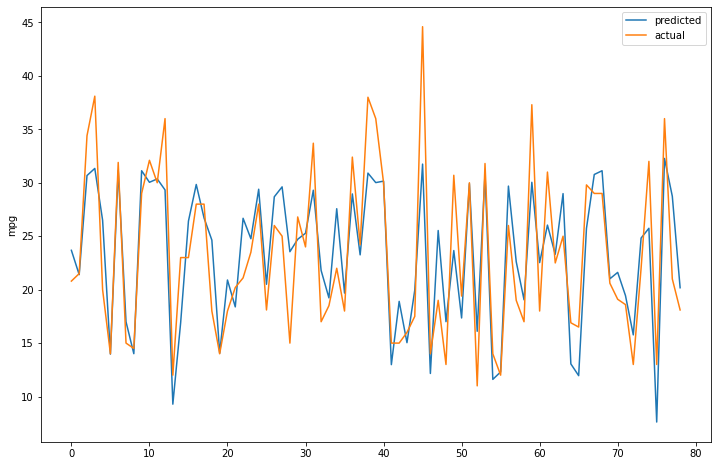

In [21]:
result_dict['kitchen_sink_elastic_net']= build_model(partial(elastic_net_reg,
                                                                 alpha= 1,
                                                                 l1_ratio= 0.5),
                                                      'mpg',
                                                      ['weight',
                                                      'cylinders',
                                                      'displacement',
                                                      'horsepower',
                                                      'acceleration'],
                                                      automobile,
                                                      show_plot_Y= True)


In [22]:
compare_results()

regression:  single_linear
training score:  0.6992184754601044
test score :  0.6471838899960372

regression:  kitchen_sink_linear
training score:  0.7348306292923018
test score :  0.5609075749187775

regression:  parsimonius_linear
training score:  0.6985998049870783
test score :  0.7297921749257675

regression:  kitchen_sink_lasso
training score:  0.6971053219275963
test score :  0.7437641165634827

regression:  kitchen_sink_ridge
training score:  0.7149703212436793
test score :  0.6494776424511215

regression:  kitchen_sink_elastic_net_ols
training score:  0.7304549388529216
test score :  0.5942547684274024

regression:  kitchen_sink_elastic_net_lasso
training score:  0.7025266928434165
test score :  0.7255099935688594

regression:  kitchen_sink_elastic_net_ridge
training score:  0.7043677581995811
test score :  0.7135875942540302

regression:  kitchen_sink_elastic_net
training score:  0.7038787158280504
test score :  0.7173263056180765



In [23]:
def svr_reg(x_train, y_train, kernel= 'linear', 
            epsilon= 0.05, C= 0.3):
    model = SVR(kernel= kernel, epsilon= epsilon, C= C)
    model.fit(x_train, y_train)
    
    return model

training score:  0.7099444738744527
test score:  0.6597362489158796


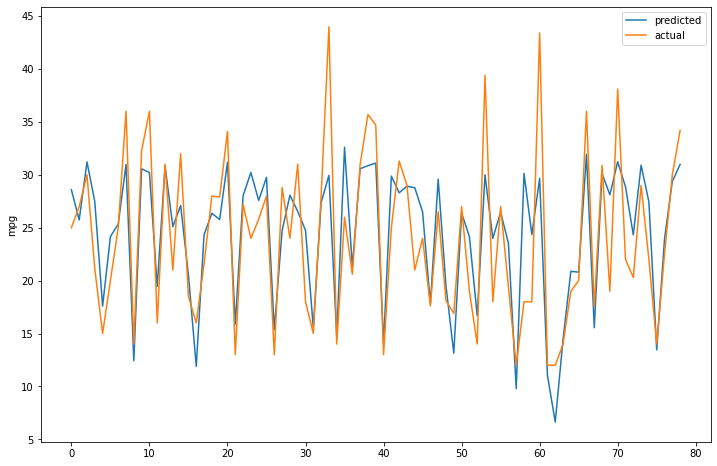

In [24]:
result_dict['kitchen_sink_svr']= build_model(svr_reg,
                                             'mpg',
                                             ['weight',
                                             'cylinders',
                                             'displacement',
                                             'horsepower',
                                             'acceleration'],
                                             automobile,
                                             show_plot_Y= True)


In [25]:
compare_results()

regression:  single_linear
training score:  0.6992184754601044
test score :  0.6471838899960372

regression:  kitchen_sink_linear
training score:  0.7348306292923018
test score :  0.5609075749187775

regression:  parsimonius_linear
training score:  0.6985998049870783
test score :  0.7297921749257675

regression:  kitchen_sink_lasso
training score:  0.6971053219275963
test score :  0.7437641165634827

regression:  kitchen_sink_ridge
training score:  0.7149703212436793
test score :  0.6494776424511215

regression:  kitchen_sink_elastic_net_ols
training score:  0.7304549388529216
test score :  0.5942547684274024

regression:  kitchen_sink_elastic_net_lasso
training score:  0.7025266928434165
test score :  0.7255099935688594

regression:  kitchen_sink_elastic_net_ridge
training score:  0.7043677581995811
test score :  0.7135875942540302

regression:  kitchen_sink_elastic_net
training score:  0.7038787158280504
test score :  0.7173263056180765

regression:  kitchen_sink_svr
training score: 

In [30]:
def kneighbors_reg(x_train,  y_train, n_neighbors= 10):
    
    model= KNeighborsRegressor(n_neighbors= n_neighbors)
    model.fit(x_train, y_train)
    
    return model

training score:  0.7622866341116169
test score:  0.6894643057752065


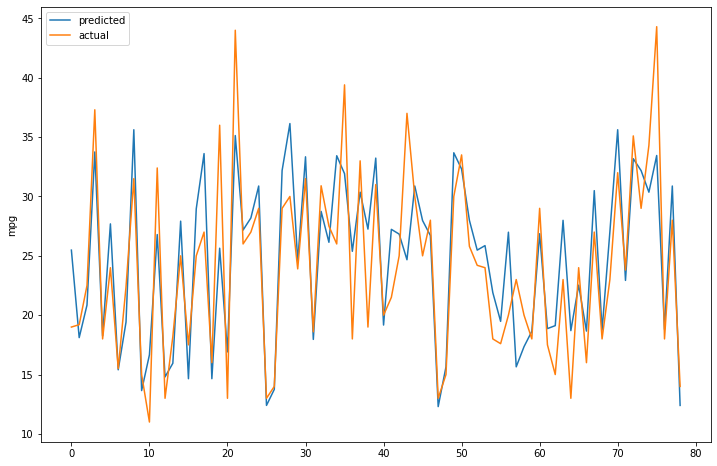

In [32]:
result_dict['kitchen_sink_kneighbors']= build_model(kneighbors_reg,
                                                    'mpg',
                                                    ['weight',
                                                    'cylinders',
                                                    'displacement',
                                                    'horsepower',
                                                    'acceleration'],
                                                     automobile,
                                                     show_plot_Y= True)


In [33]:
compare_results()

regression:  single_linear
training score:  0.6992184754601044
test score :  0.6471838899960372

regression:  kitchen_sink_linear
training score:  0.7348306292923018
test score :  0.5609075749187775

regression:  parsimonius_linear
training score:  0.6985998049870783
test score :  0.7297921749257675

regression:  kitchen_sink_lasso
training score:  0.6971053219275963
test score :  0.7437641165634827

regression:  kitchen_sink_ridge
training score:  0.7149703212436793
test score :  0.6494776424511215

regression:  kitchen_sink_elastic_net_ols
training score:  0.7304549388529216
test score :  0.5942547684274024

regression:  kitchen_sink_elastic_net_lasso
training score:  0.7025266928434165
test score :  0.7255099935688594

regression:  kitchen_sink_elastic_net_ridge
training score:  0.7043677581995811
test score :  0.7135875942540302

regression:  kitchen_sink_elastic_net
training score:  0.7038787158280504
test score :  0.7173263056180765

regression:  kitchen_sink_svr
training score: 

In [34]:
def apply_standard_scaler(x):
    
    scaler = StandardScaler()
    scaler.fit(x)
    
    return scaler.transform(x)
    

In [42]:
def sgd_reg(x_train, y_train, max_iter= 10000, tol= 1e-3):
    
    model= SGDRegressor(max_iter= max_iter, tol = tol)
    model.fit(x_train, y_train)
    
    return model

training score:  0.6969939745366666
test score:  0.7236689211386396


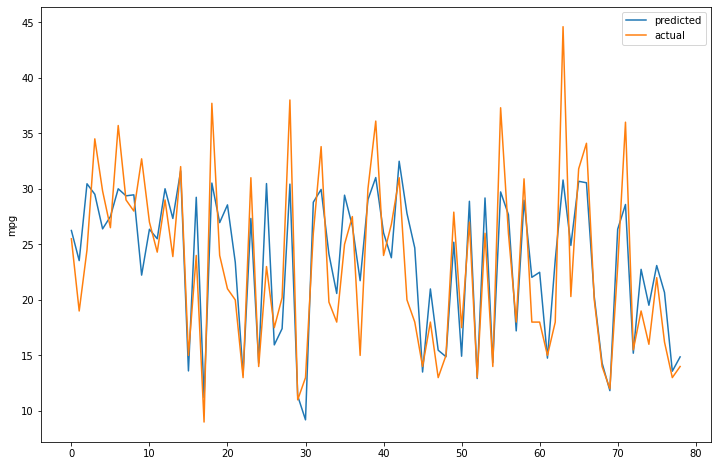

In [43]:
result_dict['kitchen_sink_sgd']= build_model(sgd_reg,
                                            'mpg',
                                            ['weight',
                                            'cylinders',
                                            'displacement',
                                            'horsepower',
                                            'acceleration'],
                                            automobile,
                                            show_plot_Y= True,
                                            preprocess_fn= apply_standard_scaler)


In [44]:
def decision_tree_reg(x_train, y_train, max_depth= 2):
    
    model= DecisionTreeRegressor(max_depth= max_depth)
    model.fit(x_train, y_train)
    
    return model

training score:  0.7370278716077892
test score:  0.6785525011818094


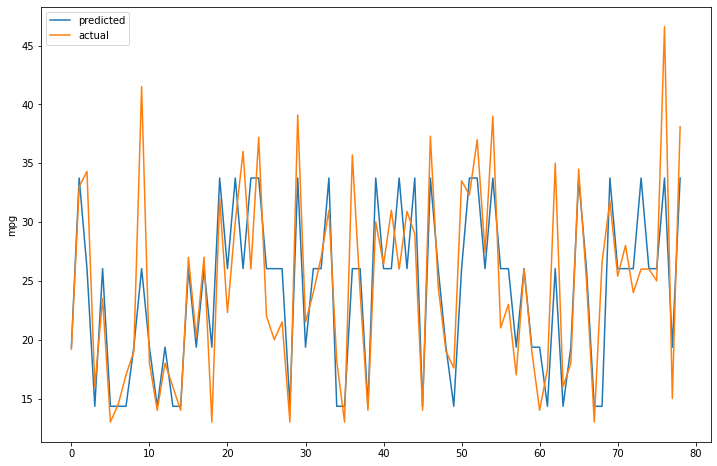

In [45]:
result_dict['kitchen_sink_decision_tree']= build_model(decision_tree_reg,
                                                       'mpg',
                                                       ['weight',
                                                       'cylinders',
                                                       'displacement',
                                                       'horsepower',
                                                       'acceleration'],
                                                        automobile,
                                                        show_plot_Y= True)


In [46]:
def lars_reg(x_train, y_train, n_nonzero_coefs= 4):
    
    model = Lars(n_nonzero_coefs= n_nonzero_coefs)
    model.fit(x_train, y_train)
    
    return model

training score:  0.6992554430909916
test score:  0.7399416214975072


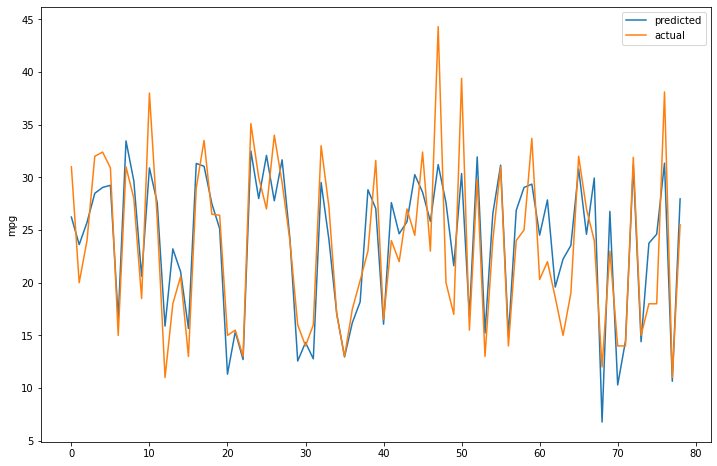

In [47]:
result_dict['kitchen_sink_lars']= build_model(lars_reg,
                                             'mpg',
                                             ['weight',
                                             'cylinders',
                                             'displacement',
                                             'horsepower',
                                             'acceleration'],
                                             automobile,
                                             show_plot_Y= True)
